In [1]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import ExtraTreesRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [2]:
# Load ML model

loaded_rf_ab = joblib.load('model_ExtraTrees.joblib')

In [6]:
df = pd.read_csv('hao_augmented_dataset.csv')

input_col = ['in_amount_mmol',
             'p_amount_mmol',
             'sol_amount_ml',
             'TOP_amount_mmol',
             'acid_amount_mmol',
             'amine_amount_mmol',
             'thiol_amount_mmol',
             'zinc_amount_mmol',
             'other_amount_mmol',
             'total_volume_ml',
             'temp_c',
             'time_min',
             'x0_chloroindium oxalate',
             'x0_indium acetate',
             'x0_indium bromide',
             'x0_indium chloride',
             'x0_indium iodide',
             'x0_indium myristate',
             'x0_indium oxalate',
             'x0_indium palmitate',
             'x0_indium trifluoroacetate',
             'x0_indium tris(N,N-diisopropylacetamidinato)',
             'x1_bis(trimethylsilyl)phosphine',
             'x1_phosphine gas',
             'x1_phosphorus trichloride',
             'x1_sodium phosphide',
             'x1_tris(diethylamino)phosphine',
             'x1_tris(dimethylamino)phosphine',
             'x1_tris(trimethylgermyl)phosphine',
             'x1_tris(trimethylsilyl)phosphine',
             'x1_white phosphorus',
             'x2_4-ethylpyridine',
             'x2_None',
             'x2_dimethylformamide',
             'x2_mesitylene',
             'x2_octadecene',
             'x2_toluene',
             'x3_None',
             'x3_trioctylphosphine',
             'x4_None',
             'x4_lauric acid',
             'x4_myristic acid',
             'x4_oleic acid',
             'x4_palmitic acid',
             'x4_stearic acid',
             'x5_None',
             'x5_dioctylamine',
             'x5_dodecylamine',
             'x5_hexadecylamine',
             'x5_octylamine',
             'x5_oleylamine',
             'x6_None',
             'x6_dodecanethiol',
             'x7_None',
             'x7_zinc acetate',
             'x7_zinc bromide',
             'x7_zinc chloride',
             'x7_zinc iodide',
             'x7_zinc octanoate',
             'x7_zinc oleate',
             'x7_zinc stearate',
             'x7_zinc undecylenate',
             'x8_None',
             'x8_acetic acid',
             'x8_copper bromide',
             'x8_superhydride',
             'x8_oleic acid',
             'x8_tetrabutylammonium myristate',
             'x8_trioctylamine',
             'x8_trioctylphosphine oxide',
             'x8_water',
             'x8_zinc iodide'
            ]

#Three individual outputs:
diameter = ['diameter_nm']
emission = ['emission_nm']
absorbance = ['abs_nm']

#Splitting dataset

X = df[input_col]

Y_d = df[diameter]
Y_e = df[emission]
Y_a = df[absorbance]


X_train_d, X_test_d, Y_train_d, Y_test_d = train_test_split(X, Y_d, test_size=0.15, random_state=45, shuffle=True)
X_train_e, X_test_e, Y_train_e, Y_test_e = train_test_split(X, Y_e, test_size=0.15, random_state=45, shuffle=True)
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(X, Y_a, test_size=0.15, random_state=45, shuffle=True)

predicting absorbance

In [8]:
ET_regr = ExtraTreesRegressor(n_estimators=2,
                            max_features=20,     
                            random_state=23).fit(X_train, Y_train)
            
ET_regr.fit(X_train, Y_train)            
ET_Y_pred = ET_regr.predict(X_test)

outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    ET_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i], squared=False)
    ET_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', ET_r2, '; MSE:', ET_MSE, '; RMSE:', ET_RMSE, '; MAE:', ET_MAE )

diameter:  r2: 0.5226717146087895 ; MSE: 0.5153475587545118 ; RMSE: 0.7178771195368409 ; MAE: 0.4718686867727273
absorbance:  r2: 0.7241021737535902 ; MSE: 1002.882996601852 ; RMSE: 31.668327972942492 ; MAE: 20.28787878636364
emission:  r2: 0.830417511744725 ; MSE: 425.146464487374 ; RMSE: 20.619080107690884 ; MAE: 11.878787875757581


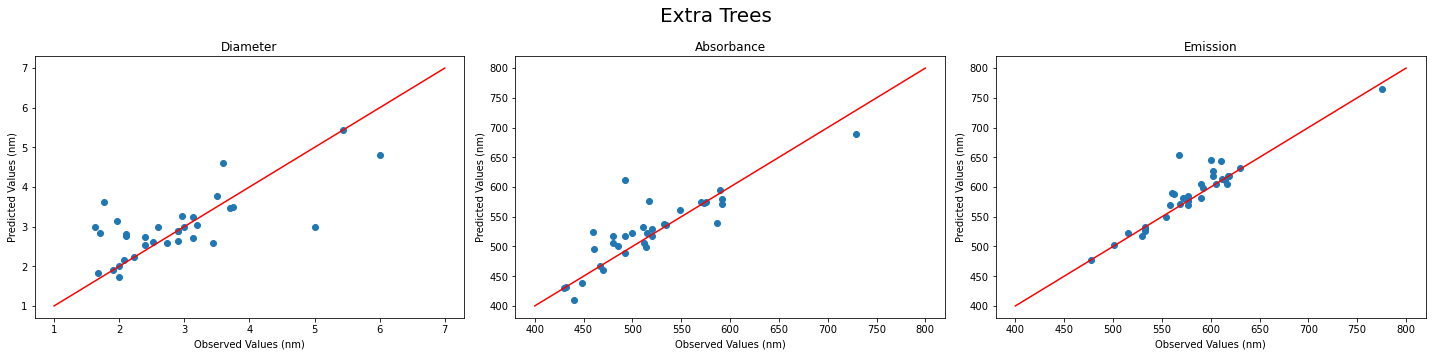

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Extra Trees', fontsize=20)

ax1.plot(Y_test.iloc[:, 0], pd.DataFrame(ET_Y_pred).loc[:, 0],'o')
ax1.plot([1,7],[1,7], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(Y_test.iloc[:, 1], pd.DataFrame(ET_Y_pred).loc[:, 1],'o')
ax2.plot([400,800],[400,800], color = 'r')
ax2.set_title('Absorbance')
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(Y_test.iloc[:, 2], pd.DataFrame(ET_Y_pred).loc[:, 2],'o')
ax3.plot([400,800],[400,800], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
fig.tight_layout()